One of the nice things with the Fourier transform is that it can produce interesting visualizations. One of them I would term a "classic" in its genre and is often featured in interactive explorations of the Fourier transform. The example I have in mind is Jack Schaedler's wonderful "Circles, Sines and Signals" which can be found here: <https://jackschaedler.github.io/circles-sines-signals/index.html>.

Let's say a function is written as a Fourier series:

$$
f(t) = \sum_{i=0}^n a_i \exp{j \omega_i t}
$$

When $\omega_i = i \, \omega$, this function becomes periodic. Its period is given by the lowest nonzero frequency, here $\omega$. Also, since $f(t)$ is a sum of complex numbers, it can be represented in the complex plane.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_component(z, origin=None, ax=None):
    "Plots a component in the complex plane, with a circle and an arrow."
    if ax is None:
        ax = plt.gca()
    if origin is None:
        origin = 0j
    c = plt.Circle((origin.real, origin.imag), radius=abs(z), fc='none', ec='k')
    ax.add_artist(c)
    ax.arrow(origin.real, origin.imag, z.real, z.imag, head_width=0.25, head_length=0.5, fc='k', ec='k',
              **{'length_includes_head': True})

(-10, 10)

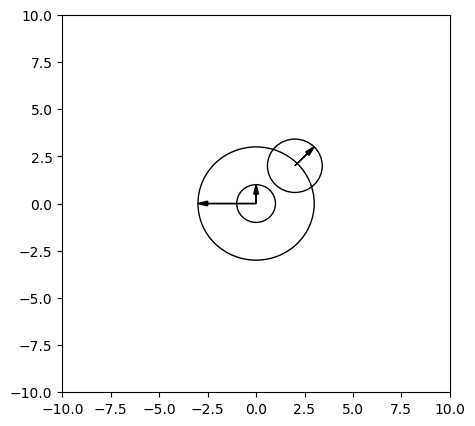

In [3]:
plt.figure(figsize=(5, 5))
plot_component(1j)
plot_component(-3)
plot_component(1 + 1j, 2 + 2j)
plt.xlim(-10, 10)
plt.ylim(-10, 10)

Now on to plotting a series. 

In [4]:
def plot_series(weights, omega, t, ax=None):
    "Plots a Fourier series in the complex plane."
    origin = 0j
    for ind, w in enumerate(weights):
        z = w * np.exp(1j * ind * omega * t)
        plot_component(z, origin, ax=ax)
        origin += z
    return origin

In [5]:
omega = 2 * np.pi
weights = [1, 2+2j, 1.5j, 1j-1, -0.5]
t = 0.

(-10, 10)

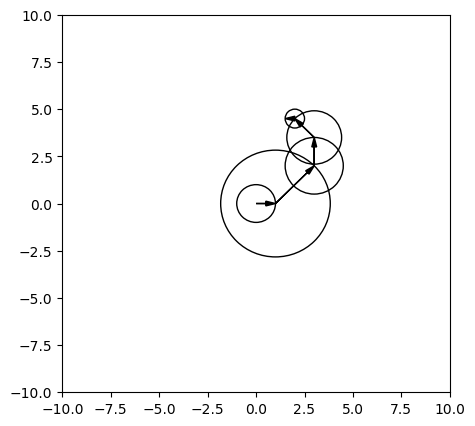

In [6]:
plt.figure(figsize=(5, 5))
plot_series(weights, omega, t)
plt.xlim(-10, 10)
plt.ylim(-10, 10)

Okay, let's now animate this:

In [7]:
from ipywidgets import interact, fixed
from IPython.display import display

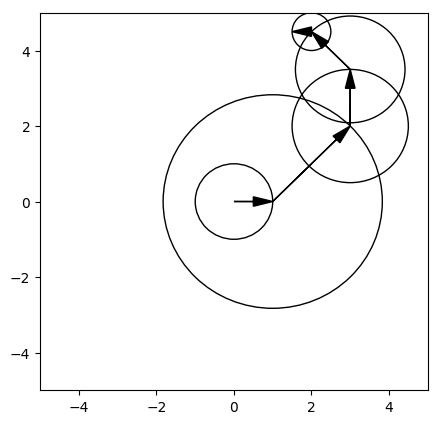

In [8]:
format_ax = lambda: plt.xlim(-5, 5) and plt.ylim(-5, 5)

@interact
def interactive_series(weights=fixed(weights), omega=fixed(omega), t=(0, 1, 0.01)):
    fig, ax = plt.subplots(figsize=(5, 5))
    plot_series(weights, omega, t)
    format_ax()

This is already pretty cool, but let's do something better. Let's trace the real part of the complex number as a function of time t.

In [9]:
def fourier_sum(weights, omega, t):
    "Sums the harmonic components of the Fourier sum."
    return sum(w * np.exp(1j * omega * ind * t) for ind, w in enumerate(weights))

In [10]:
fourier_sum(weights, omega, 0.1).real

-0.22165231501051424

In [11]:
def plot_series_and_real_part(weights, omega, t, ax):
    "Plots the real part at the right of the circles."
    current_z = plot_series(weights, omega, t, ax=ax[0])
    ax[0].plot(current_z.real, current_z.imag, 'ro')
    ax[1].plot(t, current_z.real, 'bo')
    ts = np.linspace(0, 1, num=100)
    real_signal = [fourier_sum(weights, omega, _).real for _ in ts]
    ax[1].plot(ts, real_signal, alpha=0.5)

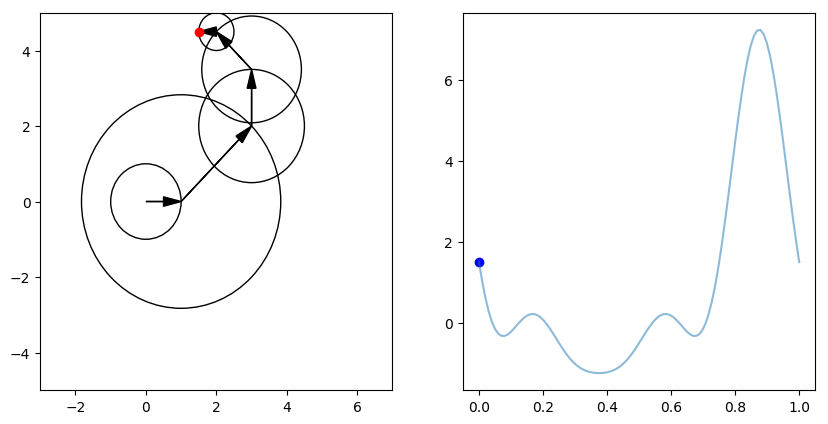

In [12]:
format_ax = lambda ax: ax.set_xlim(-3, 7) and ax.set_ylim(-5, 5)

@interact
def interactiveplot_series_and_real_part(weights=fixed(weights), omega=fixed(omega), t=(0, 1, 0.01)):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    plot_series_and_real_part(weights, omega, t, ax=ax)
    format_ax(ax[0])

# Applying this to other functions 

It turns out that we can plot any function with the Fourier approximation framework and make nice plots. For instance, sinc:

In [13]:
sinc_continuous = lambda t: np.sinc((t-0.5)*10.)
discrete_t = np.linspace(0, 1, num=13)
sinc_discrete = sinc_continuous(discrete_t)

In [14]:
weights = np.fft.rfft(sinc_discrete)
weights

array([ 1.21681814+0.j        , -1.14810818-0.28298325j,
        1.08030045+0.56698541j, -0.87865498-0.77842039j,
        0.70640254+1.02340077j, -0.37131018-0.97906447j,
        0.00296127+0.02438826j])

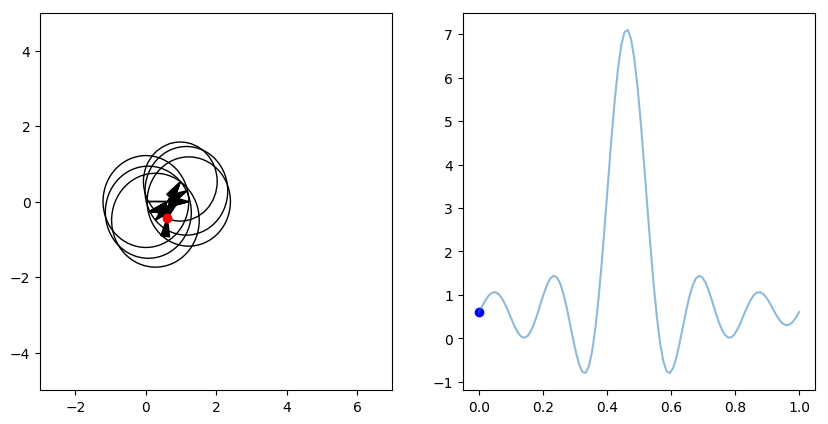

In [15]:
format_ax = lambda ax: ax.set_xlim(-3, 7) and ax.set_ylim(-5, 5)

@interact
def interactiveplot_series_and_real_part(weights=fixed(weights), omega=fixed(omega), t=(0, 1, 0.01)):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    plot_series_and_real_part(weights, omega, t, ax=ax)
    format_ax(ax[0])

What about some exponential times cosinus?

In [16]:
exp_continuous = lambda t: np.exp((t-0.5)*10.) * np.cos(3 * t)
discrete_t = np.linspace(0, 1, num=13)
exp_discrete = exp_continuous(discrete_t)

In [17]:
weights = np.fft.rfft(exp_discrete)

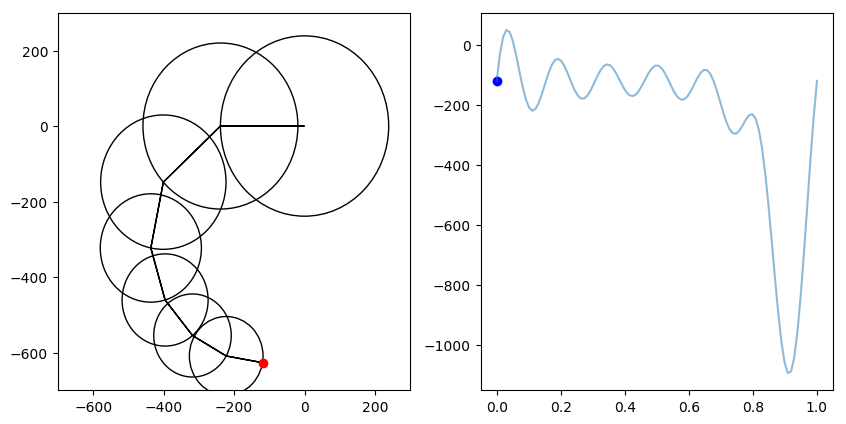

In [18]:
format_ax = lambda ax: ax.set_xlim(-700, 300) and ax.set_ylim(-700, 300)

@interact
def interactiveplot_series_and_real_part(weights=fixed(weights), omega=fixed(omega), t=(0, 1, 0.01)):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    plot_series_and_real_part(weights, omega, t, ax=ax)
    format_ax(ax[0])

# Conclusions 

I hope that this notebook has demonstrated how beautiful the complex plane visualization of the Fourier series can be.